# ***OpenCV University - [Deep Learning with PyTorch](https://opencv.org/university/course/deep-learning-with-pytorch/)***

------------------------------------------------------------

In [1]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [2]:
!wget "https://www.dropbox.com/sh/miycgl63t70t8gx/AAA8xGsR4WjHRuKVdFKR4c1la?dl=1" -O sample_logs.zip

!unzip -q sample_logs.zip

--2024-09-23 13:14:15--  https://www.dropbox.com/sh/miycgl63t70t8gx/AAA8xGsR4WjHRuKVdFKR4c1la?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/y0euey23vj0p146a7515d/AGTNyhEA8FFc4aixUf7wmGc?rlkey=w02olksb2zbkjel6qx8wwykkz&dl=1 [following]
--2024-09-23 13:14:15--  https://www.dropbox.com/scl/fo/y0euey23vj0p146a7515d/AGTNyhEA8FFc4aixUf7wmGc?rlkey=w02olksb2zbkjel6qx8wwykkz&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc553b94ebc19ca2f8dc1464b814.dl.dropboxusercontent.com/zip_download_get/B-ib_0CSn9D8G8bdkW9VHDEOmUeNGJ8skLnZJpuk2ryyXWYH_CUqh795qyCwcDyIJ6BweBa1heLaHJNIzd6SWf1RBq2gWD0ImMh7djV5E9DfTg# [following]
--2024-09-23 13:14:17--  https://uc553b94ebc19ca2f8dc1464b814.dl.dropboxusercontent.com/zip_

In [3]:
!ls /kaggle/working/logs_fashion_mnist

no_regularization  regularization


In [4]:
!tree /kaggle/working/logs_fashion_mnist/regularization

/kaggle/working/logs_fashion_mnist/regularization
|-- 00000
|   `-- default
|       |-- metadata.tsv
|       |-- sprite.png
|       `-- tensors.tsv
|-- Accuracy_train-val_train
|   `-- events.out.tfevents.1582146167.pc.18717.3
|-- Accuracy_train-val_validation
|   `-- events.out.tfevents.1582146167.pc.18717.4
|-- Loss_train-val_train
|   `-- events.out.tfevents.1582146167.pc.18717.1
|-- Loss_train-val_validation
|   `-- events.out.tfevents.1582146167.pc.18717.2
|-- events.out.tfevents.1582146148.pc.18717.0
`-- projector_config.pbtxt

6 directories, 9 files


In [5]:
!tree /kaggle/working/logs_fashion_mnist/no_regularization

/kaggle/working/logs_fashion_mnist/no_regularization
|-- 00000
|   `-- default
|       |-- metadata.tsv
|       |-- sprite.png
|       `-- tensors.tsv
|-- Accuracy_train-val_train
|   `-- events.out.tfevents.1582144477.pc.8961.3
|-- Accuracy_train-val_validation
|   `-- events.out.tfevents.1582144477.pc.8961.4
|-- Loss_train-val_train
|   `-- events.out.tfevents.1582144477.pc.8961.1
|-- Loss_train-val_validation
|   `-- events.out.tfevents.1582144477.pc.8961.2
|-- events.out.tfevents.1582144462.pc.8961.0
`-- projector_config.pbtxt

6 directories, 9 files


In [6]:
!tensorboard --version

2.16.2


In [7]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar xf ./ngrok-v3-stable-linux-amd64.tgz -C /usr/local/bin

--2024-09-23 13:17:21--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9085090 (8.7M) [application/octet-stream]
Saving to: 'ngrok-v3-stable-linux-amd64.tgz'

ngrok-v3-stable-lin 100%[===================>]   8.66M  30.4MB/s    in 0.3s    

2024-09-23 13:17:22 (30.4 MB/s) - 'ngrok-v3-stable-linux-amd64.tgz' saved [9085090/9085090]



## ***Next steps***

### 1. Go to the [**Ngrok**](https://ngrok.com/).

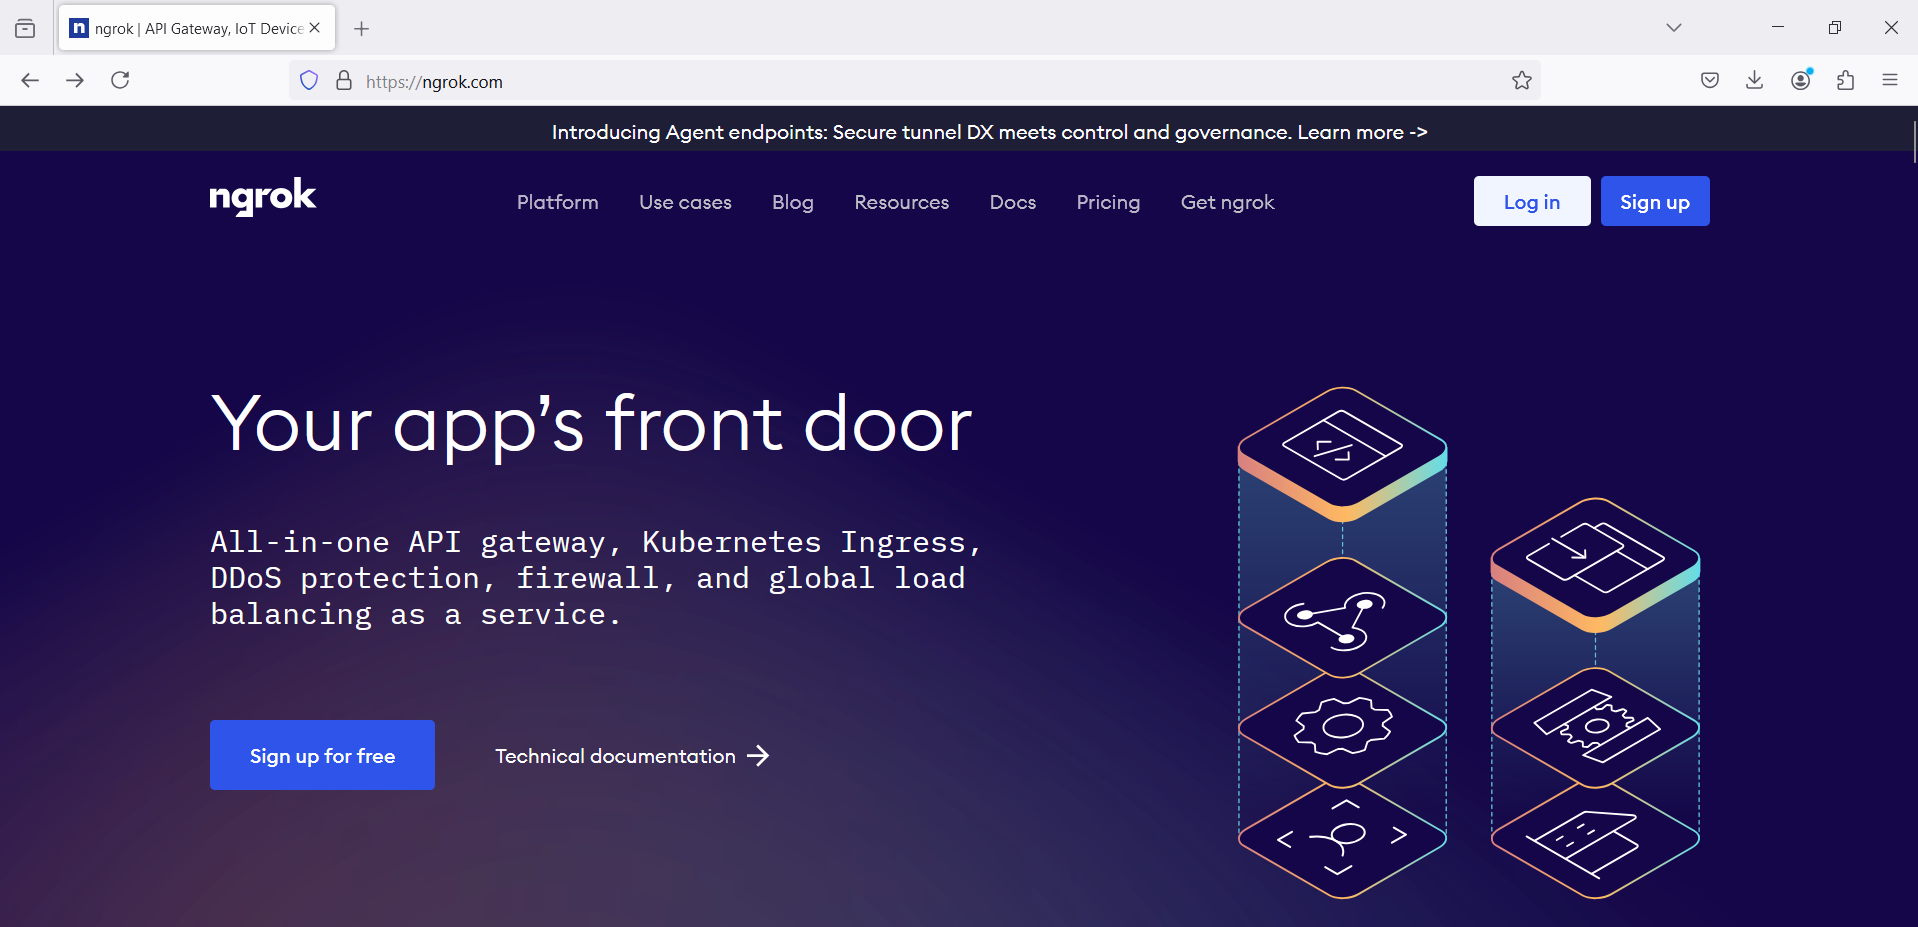

### 2. Create account or logging.

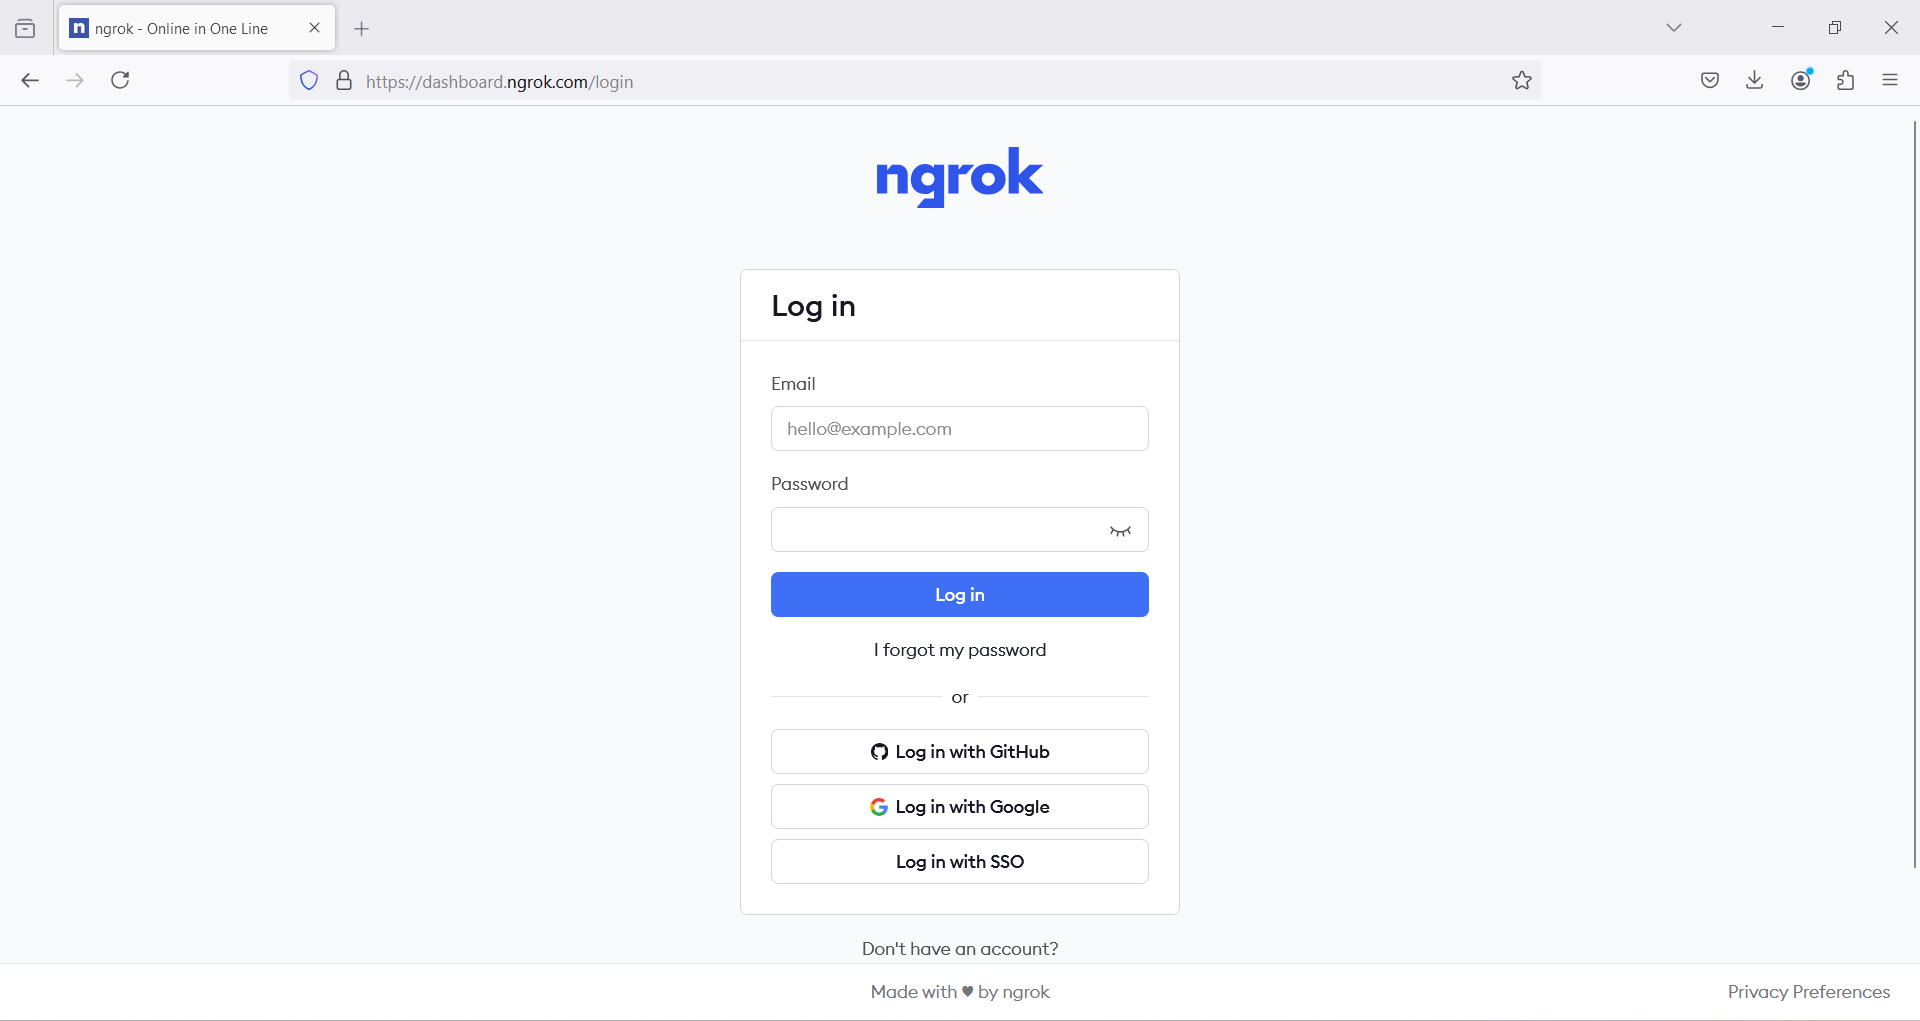

### 3. Copy Authentication token

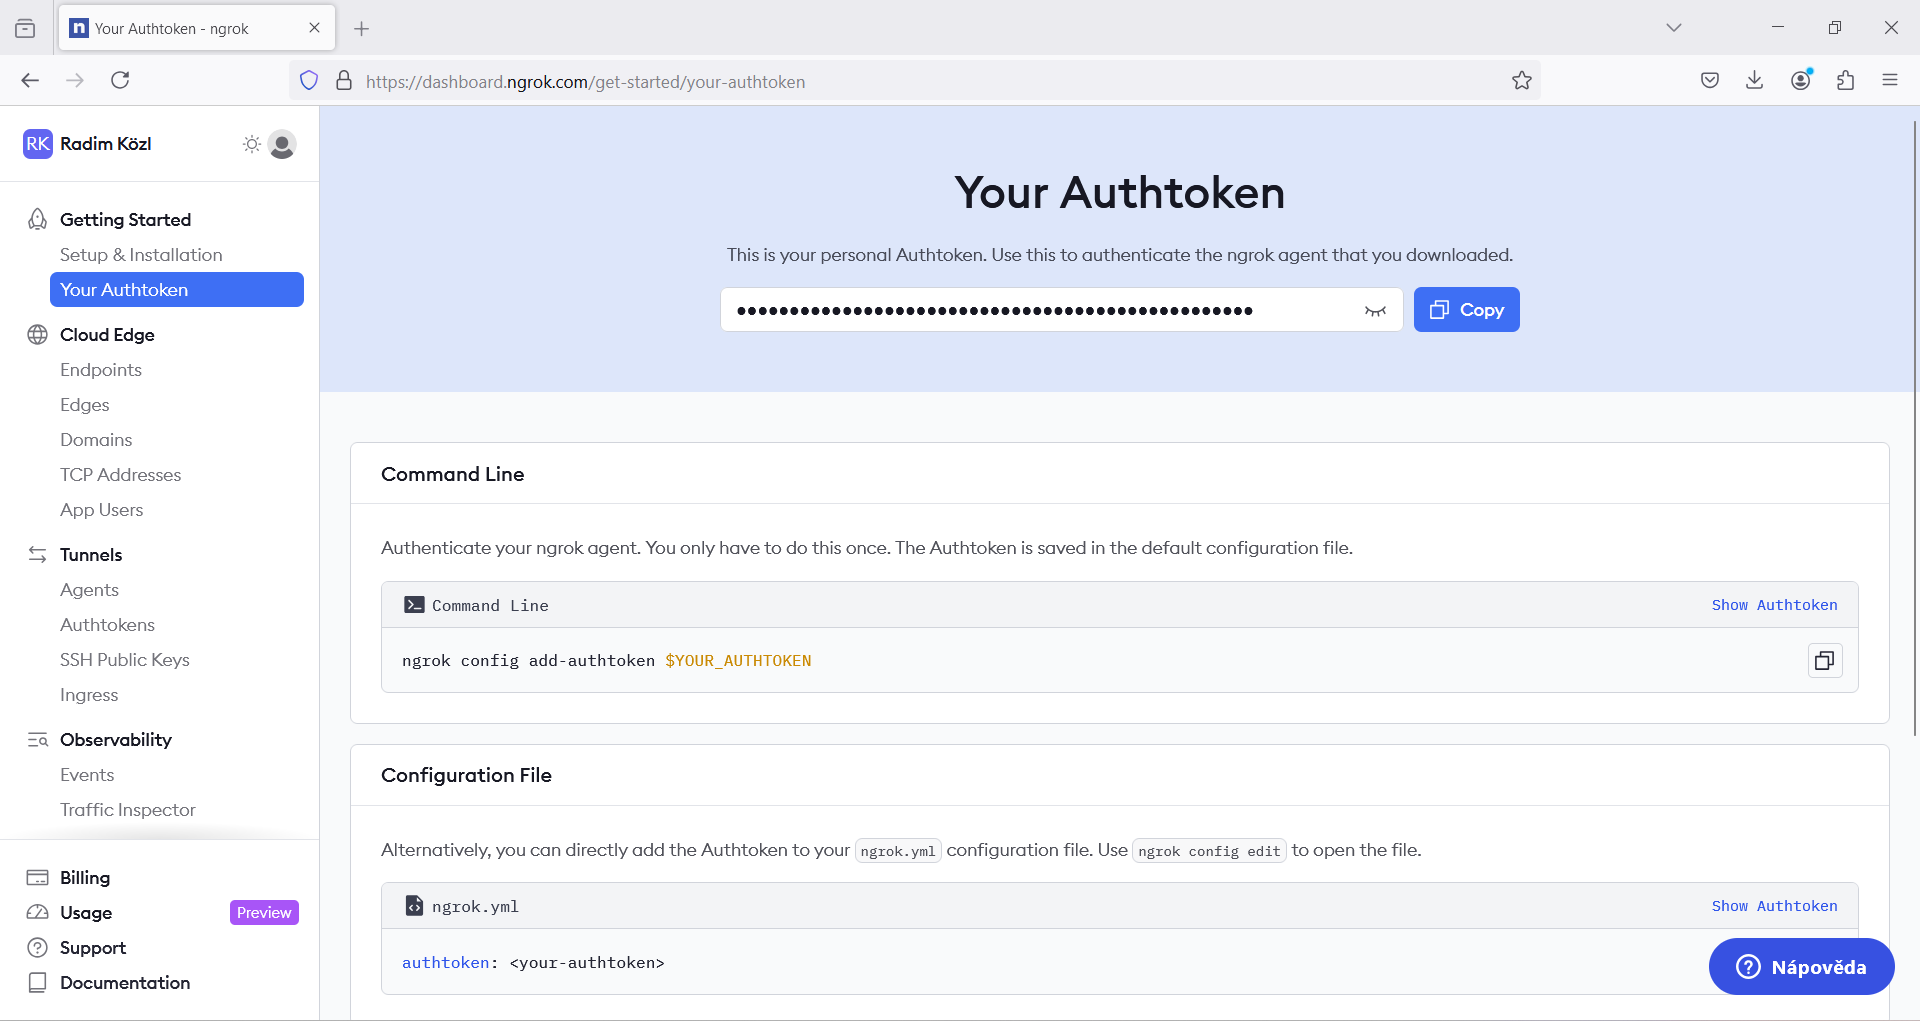

In [8]:
!ngrok authtoken <your-authtoken>

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [9]:
import os
import multiprocessing
 
pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./logs_fashion_mnist --load_fast=false --host 0.0.0.0 --port 6006 &",
                        "/usr/local/bin/ngrok http 6006 &"
                        ]]

In [10]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://9f6e-34-42-208-140.ngrok-free.app


TensorBoard 2.16.2 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


## Open web with tensorboard dasboard

### 1. open link `https://5dbe-35-230-86-19.ngrok-free.app`

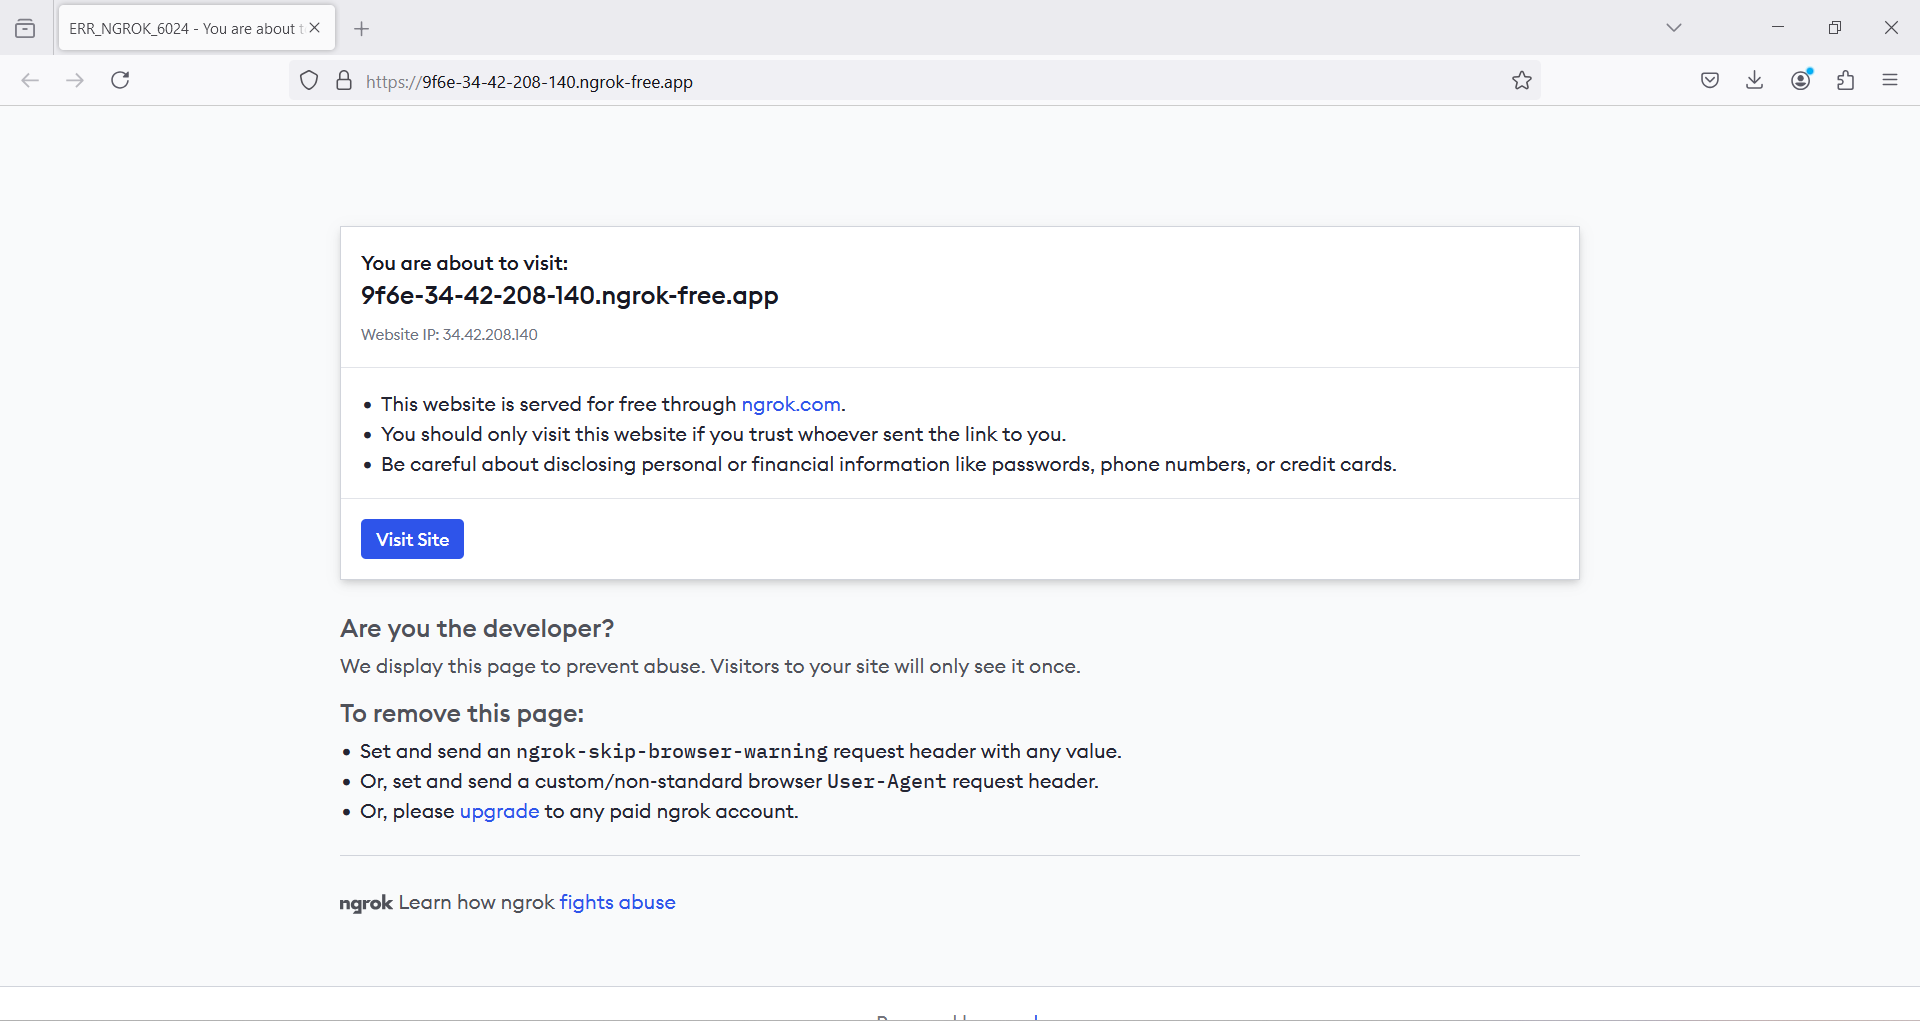

### 2. Confirm `Visit Site`

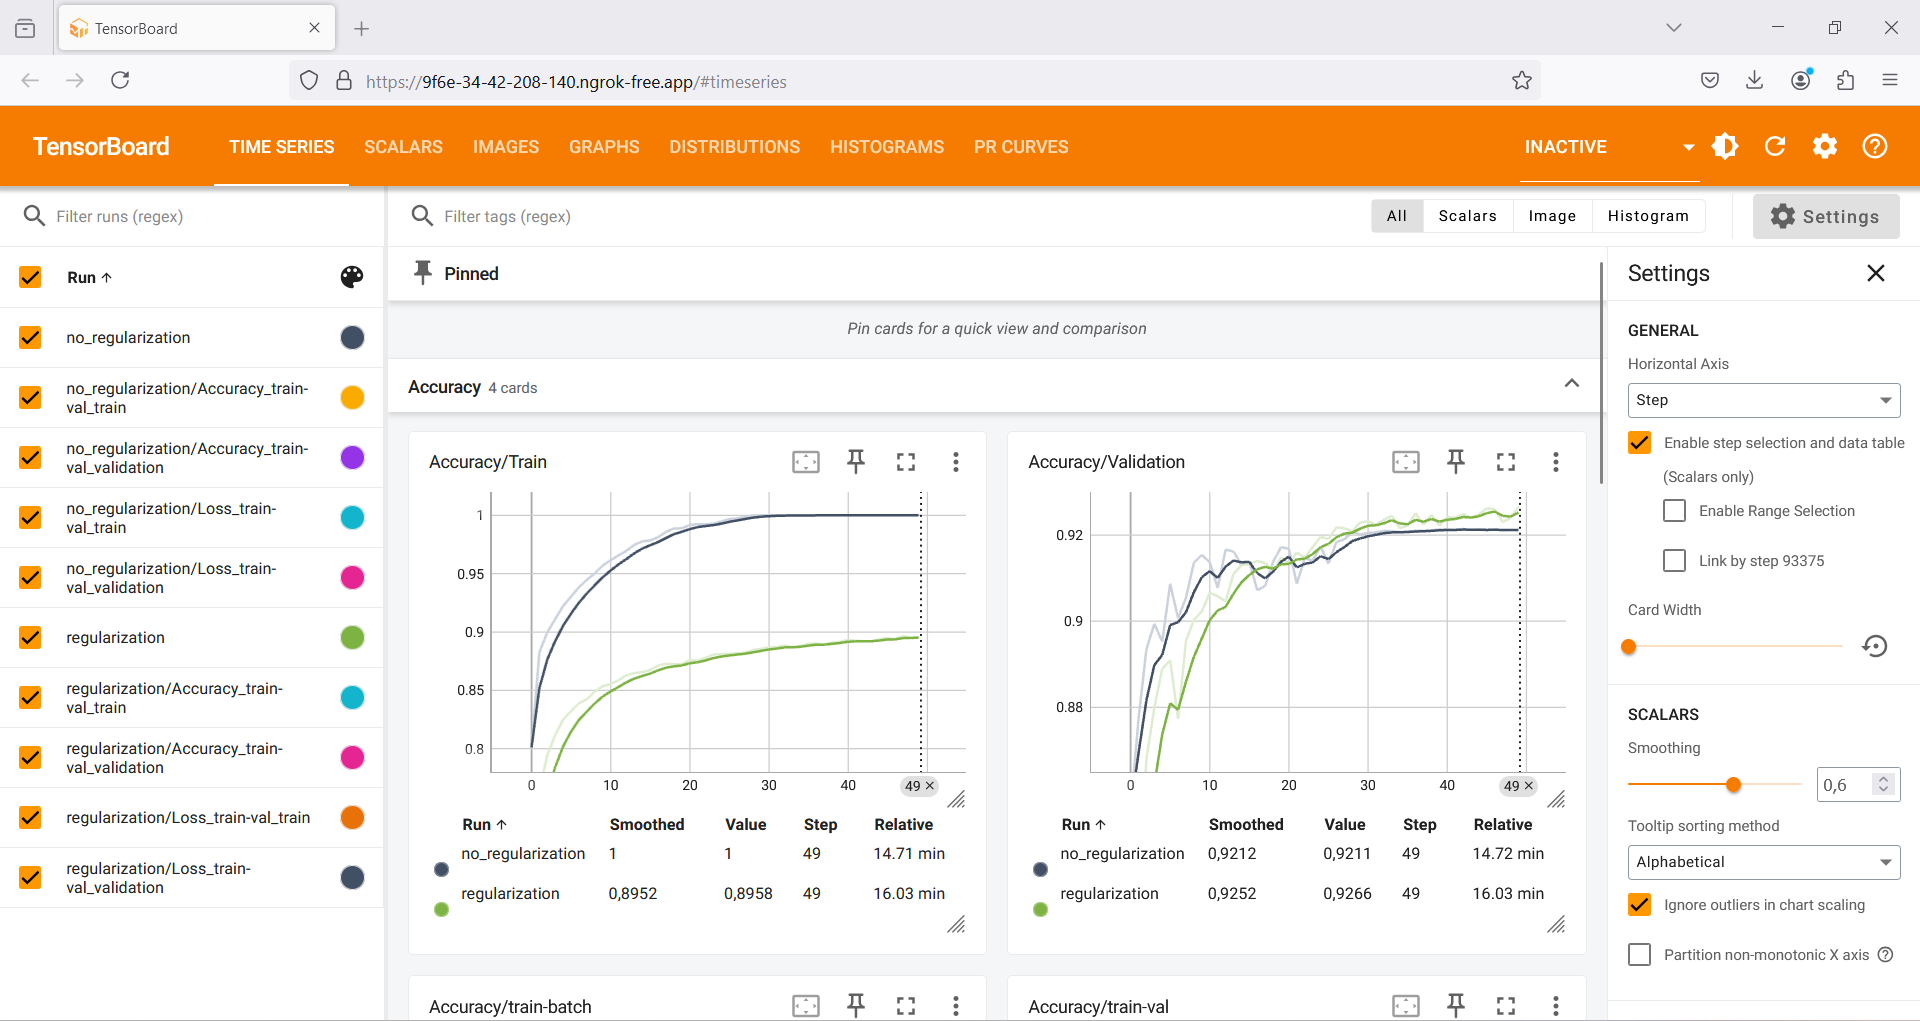